In [89]:
# Read gtf file
with open("./Viola.gtf") as f:
    gene_chr = {}
    for line in f:
        if line.startswith('#'):
            continue
        else:
            line = line.strip().split('\t')
            if line[2] == 'transcript':
                gene_chr[line[8].strip()] = line[0].strip()

with open("./Viola.gtf") as f:
    chr_gene = {}
    for line in f:
        if line.startswith("#"):
            continue
        else:
            line = line.strip().split("\t")
            if line[2] == "transcript":
                if line[0] not in chr_gene:
                    chr_gene[line[0]] = []
                chr_gene[line[0]].append(line[8].strip())

# Read synteny file
gene_pool = set()
with open("./Viola.Viola.anchors") as f:
    for line in f:
        if line.startswith("#"):
            continue
        line = line.strip().split("\t")
        gene_pool.add(line[0]); gene_pool.add(line[1])

with open("./Viola.Viola.anchors") as f:
    synteny = [] # {}
    block = set()
    for line in f:
        if line.startswith("#"):
            synteny.append(block)
            block = set() # list
            continue
        line = line.strip().split("\t")
        block.add(line[0]); block.add(line[1]) # block.append([line[0], line[1]])
        """
        if gene_chr[block[0][0]] not in synteny:
            synteny[gene_chr[block[0][0]]] = []
        if gene_chr[block[0][1]] not in synteny:
            synteny[gene_chr[block[0][1]]] = []
        """
    del synteny[0]
    synteny.append(block)

#pprint(synteny[:5])
"""
# Count the number of synteny blocks
print("number of syntenic genes per scaffold")
print(" ")
for key in sorted(synteny.keys(), key = lambda x: int(x.split("_")[2])):
    print(key, len(synteny[key]), len(chr_gene[key]), sep="\t")
"""

"""
print("====================")
# print("gene pairs", sum(list(map(len, synteny.values()))) // 2, sep="\t")
print("number of syntenic genes", len(gene_pool), sep="\t")
print("number of single copy genes", sum(list(map(len, chr_gene.values()))) - len(gene_pool), sep="\t")
print("gene number", sum(list(map(len, chr_gene.values()))), sep="\t\t")
"""
# pprint(synteny)
# print("++++++++++++++++++++++++")

from tqdm import tqdm
count = {}
for query in tqdm(gene_pool):
    cnt = 0
    for subject_block in synteny:
        if query in subject_block: 
            # print(subject_block)
            cnt+=1
    count[query] = cnt

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27625/27625 [00:02<00:00, 11098.61it/s]


In [92]:
dup = {}
for k, v in count.items():
    if v not in dup: dup[v] = 0
    dup[v] +=1
    if v == 15: print(k, v)
for k, v in sorted(dup.items()):
    print(k, v, sep="\t")

g31054.t1 15
g6955.t1 15
1	27095
2	314
3	96
4	45
5	17
6	13
7	8
8	7
9	10
10	3
11	5
12	6
13	2
14	2
15	2


In [95]:
target = {}
with open("./self.m8") as f:
    for line in f:
        line = line.strip().split("\t")
        target[line[0]] = float(line[-2])
        #target[(line[1], line[0])] = float(line[-2])

In [101]:
import numpy as np
value = []
cnt = 0
total = 0
for i in gene_pool:
    total += 1
    if target[i] !=0 :
        cnt += 1
        value.append(np.log10(target[i]))
print(total, total-cnt, cnt / total * 100)

27625 4524 83.62352941176471


<AxesSubplot:ylabel='Count'>

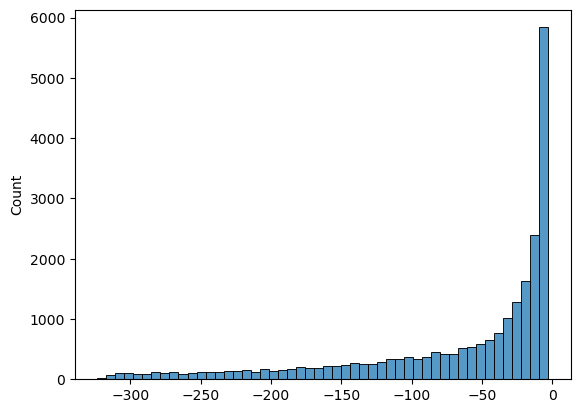

In [100]:
import seaborn as sns
import numpy as np
sns.histplot(value)